In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

from hmmlearn import hmm

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### Example data and code
https://medium.com/@natsunoyuki/hidden-markov-models-with-python-c026f778dfa7

https://anaconda.org/conda-forge/hmmlearn

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0014753

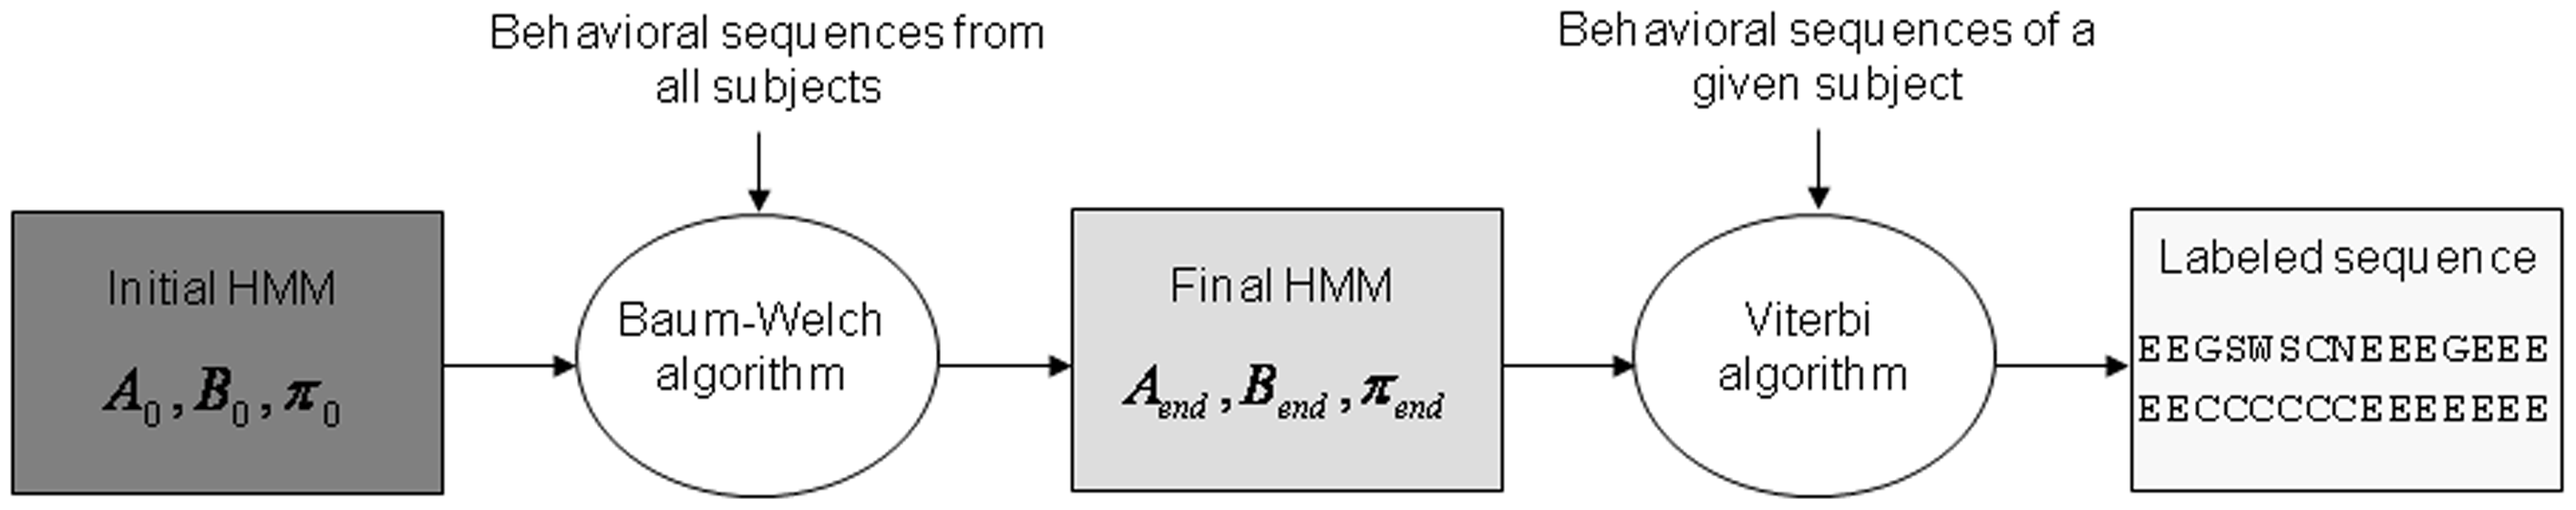

from https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0014753

In [30]:
base_dir = "https://github.com/natsunoyuki/Data_Science/blob/master/gold/gold/gold_price_usd.csv?raw=True"

example_data = pd.read_csv(base_dir)

# Convert the datetime from str to datetime object.
example_data["datetime"] = pd.to_datetime(example_data["datetime"])

# Determine the daily change in gold price.
example_data["gold_price_change"] = example_data["gold_price_usd"].diff()

# Restrict the data to later than 2008 Jan 01.
example_data = example_data[example_data["datetime"] >= pd.to_datetime("2008-01-01")]

# Use the daily change in gold price as the observed measurements X.
X = example_data[["gold_price_change"]].values
[]
# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

### Get drinking data

In [26]:
path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/polysubstance_drink3s_221019.csv'
    
data = pd.read_csv(path)
data = pd.DataFrame(data = data)
print(data.shape)
data.head()

(65191, 51)


,Unnamed: 0,Unnamed: 0.1,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,weight_pre,weight_post,weight_diff,notes,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,Cage_VDM_update,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool,day_count,min_count,sec_count,hour_count_running,min_count_running,sec_count_running,substance,value_wt
0,0,0,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,2,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58671,16,977,58611,EtOH05,0.707071
1,1,1,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,3,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58674,16,977,58614,EtOH05,0.707071
2,2,2,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,4,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58677,16,977,58617,EtOH05,0.707071
3,3,3,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,5,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:59,drink_1,0.021,2022-10-10 16:17:59,1.665419e+09,2022-10-10,10,16:17:59,16,17,59,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58679,16,977,58619,EtOH05,0.707071
4,4,4,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,15,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 17:28:38,drink_1,0.021,2022-10-10 17:28:38,1.665423e+09,2022-10-10,10,17:28:38,17,28,38,light,VDM_EtOH05,1.0,19.446,041AC165FE,etoh_05,2022-10-10 17:28:30.700963200,2022-10-10 17:28:50.146963200,light,1,0.0,same,1,1048,62918,17,1048,62858,EtOH05,0.707071


In [27]:
### convert substance to numerical

sub_to_num = {'water': 0,
              'Fent05': 1,
              'Fent20': 2,
              'EtOH05': 3,
              'EtOH10': 4,
             }

data['sub_num'] = data['substance'].map(sub_to_num)

data.head()

,Unnamed: 0,Unnamed: 0.1,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,weight_pre,weight_post,weight_diff,notes,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,Cage_VDM_update,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool,day_count,min_count,sec_count,hour_count_running,min_count_running,sec_count_running,substance,value_wt,sub_num
0,0,0,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,2,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58671,16,977,58611,EtOH05,0.707071,3
1,1,1,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,3,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58674,16,977,58614,EtOH05,0.707071,3
2,2,2,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,4,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58677,16,977,58617,EtOH05,0.707071,3
3,3,3,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,5,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:59,drink_1,0.021,2022-10-10 16:17:59,1.665419e+09,2022-10-10,10,16:17:59,16,17,59,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58679,16,977,58619,EtOH05,0.707071,3
4,4,4,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,15,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 17:28:38,drink_1,0.021,2022-10-10 17:28:38,1.665423e+09,2022-10-10,10,17:28:38,17,28,38,light,VDM_EtOH05,1.0,19.446,041AC165FE,etoh_05,2022-10-10 17:28:30.700963200,2022-10-10 17:28:50.146963200,light,1,0.0,same,1,1048,62918,17,1048,62858,EtOH05,0.707071,3


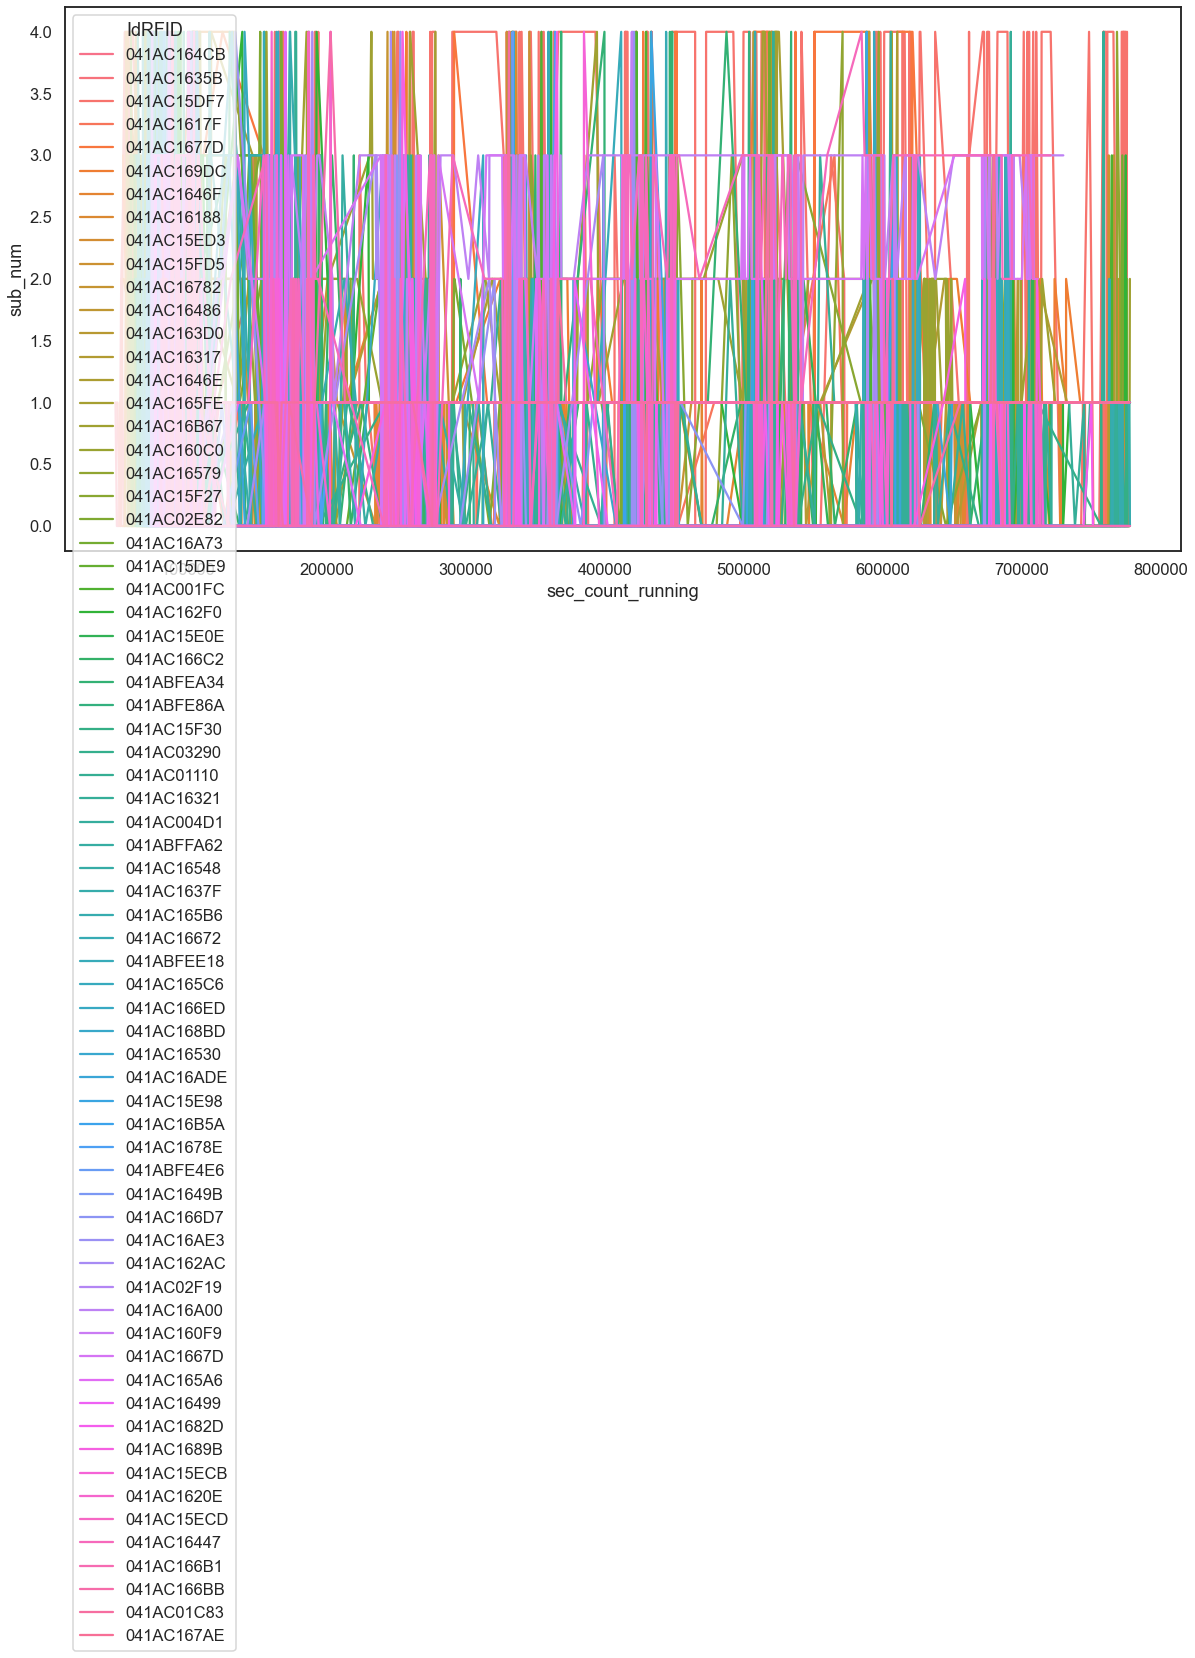

In [28]:
data=data.sort_values('sec_count_running')

plt.figure(figsize=(20, 10))
sns.lineplot(x='sec_count_running', y='sub_num', data=data, hue='IdRFID')
plt.show()

### Use most active drinking mouse to start

In [47]:
data.groupby(['IdRFID'])['substance'].value_counts()

IdRFID      substance
041ABFE4E6  water        1497
            Fent05       5   
            EtOH10       2   
            EtOH05       1   
041ABFE86A  water        593 
            EtOH05       21  
            Fent05       19  
            Fent20       15  
            EtOH10       1   
041ABFEA34  Fent05       677 
            water        84  
            Fent20       42  
            EtOH10       13  
            EtOH05       11  
041ABFEE18  Fent05       865 
            water        12  
            EtOH05       4   
            Fent20       4   
            EtOH10       2   
041ABFFA62  Fent05       778 
            water        104 
            Fent20       16  
            EtOH05       2   
041AC001FC  Fent05       926 
            water        19  
            EtOH05       9   
            EtOH10       6   
            Fent20       3   
041AC004D1  water        782 
            Fent05       4   
            EtOH05       1   
041AC01110  Fent05       501 
            water 

In [44]:
#use mouse with most activity
d = data[data['IdRFID']=='041AC164CB']

d['substance'].value_counts()

water     1505
Fent05    31  
EtOH05    13  
Fent20    12  
EtOH10    1   
Name: substance, dtype: int64

In [107]:
X = d.sort_values('sec_count_running')[['sub_num']].values

# Build the HMM model and fit 
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 99, random_state = 39)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

Unique states:
[1 0 2]

Start probabilities:
[0. 1. 0.]

Transition matrix:
[[0.83404777 0.11144819 0.05450404]
 [0.12287791 0.80245809 0.074664  ]
 [0.11166438 0.13395176 0.75438385]]

Gaussian distribution means:
[[0.        ]
 [1.        ]
 [2.09781458]]

Gaussian distribution covariances:
[[[0.00000612]]

 [[0.00000679]]

 [[0.14540007]]]


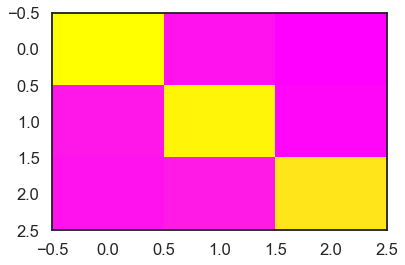

In [108]:
print("Unique states:")
print(states)

print("\nStart probabilities:")
print(model.startprob_)

print("\nTransition matrix:")
print(model.transmat_)

print("\nGaussian distribution means:")
print(model.means_)

print("\nGaussian distribution covariances:")
print(model.covars_)

fig, ax = plt.subplots()
ax.imshow(model.transmat_, aspect='auto', cmap='spring')

### Multiple mice

In [109]:
d1 = data[data['IdRFID']=='041AC164CB']
d2 = data[data['IdRFID']=='041ABFFA62']
d3 = data[data['IdRFID']=='041AC160C0']
d4 = data[data['IdRFID']=='041AC16B67']

d = pd.concat([d1, d2, d3, d4])
d.columns = data.columns

X1 = d1.sort_values('sec_count_running')[['sub_num']].values
X2 = d2.sort_values('sec_count_running')[['sub_num']].values
X3 = d3.sort_values('sec_count_running')[['sub_num']].values
X4 = d4.sort_values('sec_count_running')[['sub_num']].values

X = np.concatenate([X1, X2, X3, X4])
lengths = [len(X1), len(X2), len(X3), len(X4)]

In [122]:
# Build the HMM model and fit 
model = hmm.GaussianHMM(n_components = 2, covariance_type = "diag", n_iter = 99, random_state = 39)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

model.monitor_.converged

True

Unique states:
[1 0]

Start probabilities:
[0. 1.]

Transition matrix:
[[0.96999107 0.03000893]
 [0.02143251 0.97856749]]

Gaussian distribution means:
[[0.        ]
 [1.38670591]]

Gaussian distribution covariances:
[[[0.00000614]]

 [[0.3292437 ]]]


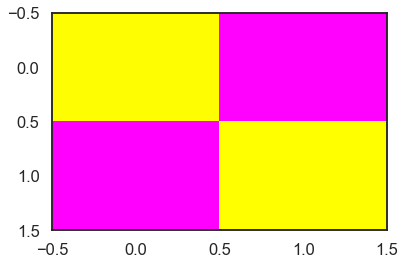

In [123]:
print("Unique states:")
print(states)

print("\nStart probabilities:")
print(model.startprob_)

print("\nTransition matrix:")
print(model.transmat_)

print("\nGaussian distribution means:")
print(model.means_)

print("\nGaussian distribution covariances:")
print(model.covars_)

fig, ax = plt.subplots()
ax.imshow(model.transmat_, aspect='auto', cmap='spring')

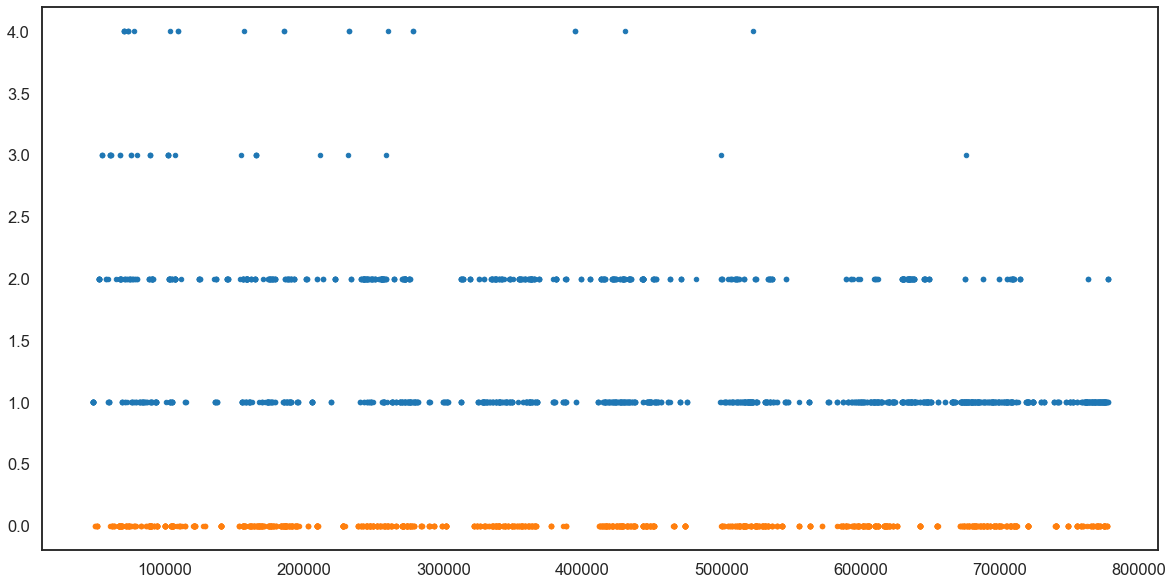

In [125]:
plt.figure(figsize=(20, 10))

for i in states:
    want = (Z == i)
    x = d["sec_count_running"].iloc[want]
    y = d["sub_num"].iloc[want]
    plt.plot(x, y, '.')

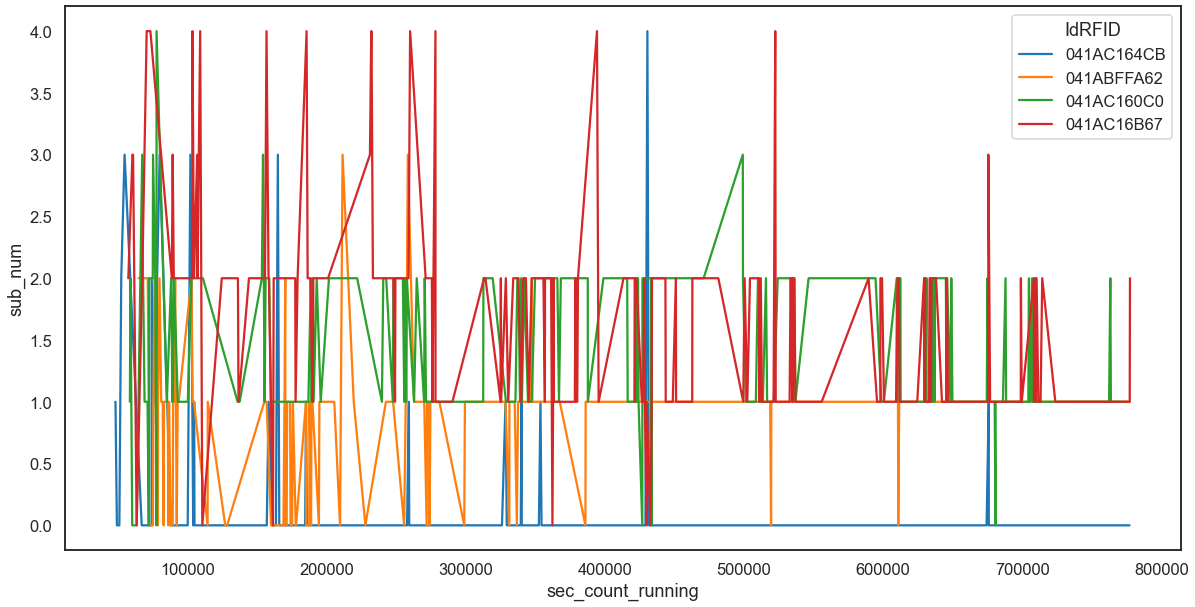

In [126]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='sec_count_running', y='sub_num', data=d, hue='IdRFID')
plt.show()